In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
customers=pandas.read_excel(r"Customer list.xlsx")
print(customers)
customers.describe()
print(customers.shape)
print(customers.columns)
print(customers.head())
print(customers.tail())
print(customers.info())

    first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
995  Ferdinand  Romanetti    Male                                   60   
996       Burk    Wortley    Male                                   22   
997   Melloney      Temby  Female                                   17   
998     Dickie    Cubbini    Male                                   30   
999      Sylas    Duffill    Male                                   56   

            DOB  Unnamed: 5   Age                     job_title  \
0    12-07-1957      1957.0  64.0           

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Unnamed:_5', 'Age',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Rank', 'Value'],
      dtype='object')
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
Unnamed:_5                              17
Age                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state      

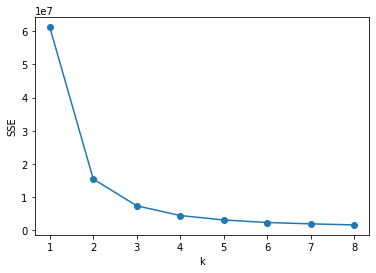

In [3]:
customers.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
print(customers.columns)
print(customers.isnull().sum(axis=0))
customers.drop(["Unnamed:_5"],axis=1, inplace=True)
customers.drop(["tenure"],axis=1, inplace=True)
customers.drop(["postcode"],axis=1, inplace=True)
customers.dropna(axis="index",how='any',inplace=True)
print(customers.isnull().sum(axis=0))

#The process of determining the k value
good_columns=customers._get_numeric_data()

SSE = [] 
for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(good_columns)
    
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()
